In [122]:
import pandas as pd
import numpy as np
import json
import os
from IPython.display import display

import scipy, scipy.io


import matplotlib
from matplotlib import *
from matplotlib import pyplot as plt
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable
# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')
from natsort import natsorted, ns

%matplotlib inline


## sklearn imports
import sklearn.linear_model
import sklearn.cross_validation
import sklearn.tree
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.feature_selection
import sklearn.pipeline
import sklearn.grid_search

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [129]:
# user changes: patient, and time period
patients = ['JH104sz1']
timePeriod = [58, 60]

# paramaters of data
freq = 1000
winSize = 500
stepSize = 500

# directories
dataDir = '../data/'
adjDir = '../adj_mats_win500_step500_freq1000/'

patient = patients[0]
patientDir = adjDir + patient + '/'
matFiles = []
for file in os.listdir(patientDir):
    if file.endswith('.mat'):
        matFiles.append(file)
        
## given time period
timePeriod = np.asarray(timePeriod) * 1000 # convert to ms
timePeriod = np.linspace(timePeriod[0], timePeriod[1], num=np.ptp(timePeriod)/winSize+1)

# find files of this time period, and show their corresponding eigenspectrum and heatmap of adjacency mat
filesInPeriod = []
for file in matFiles:
    for time in timePeriod:
        if str(int(time)) in file:
            filesInPeriod.append(file)
            
print filesInPeriod

['JH104sz1_1_before60000.mat', 'JH104sz1_2_before59500.mat', 'JH104sz1_3_before59000.mat', 'JH104sz1_4_before58500.mat', 'JH104sz1_5_before58000.mat']


In [130]:
## example grab of data
for file in matFiles:
    data = scipy.io.loadmat(patientDir + file, squeeze_me=True, struct_as_record=False)
    data = data['data']
    print file
    print data.earlyspread_labels
    break

JH104sz1_100_before10500.mat
[u'POLLPF5' u'POLLPF6' u'POLLFP2' u'POLLFP3' u'POLLFP4']


## Analyze Certain Time Period

Analyzes a certain time period input by the user in cell above to show the eigenspectrum, adjacency matrix and also the perturbation necessary to move system into instability.

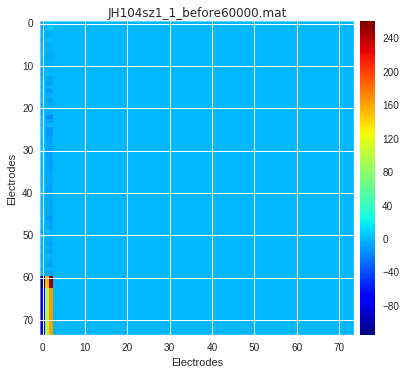

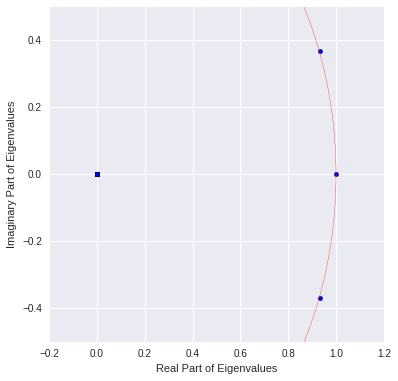

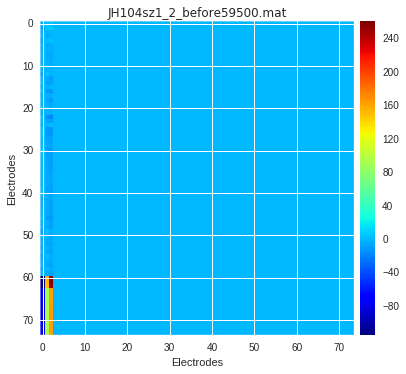

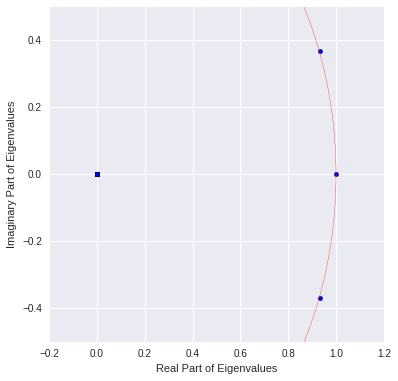

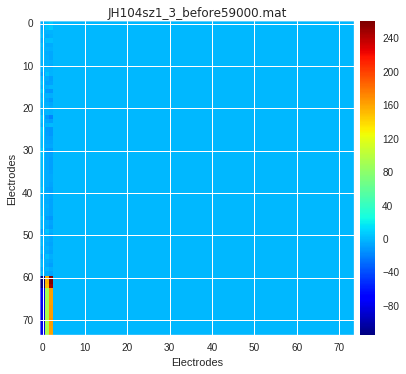

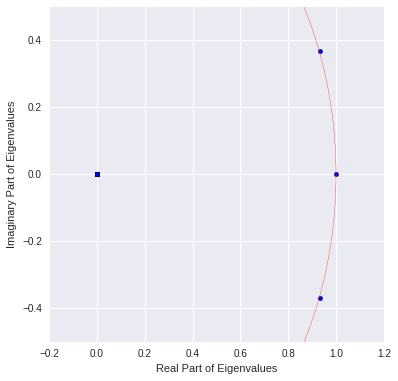

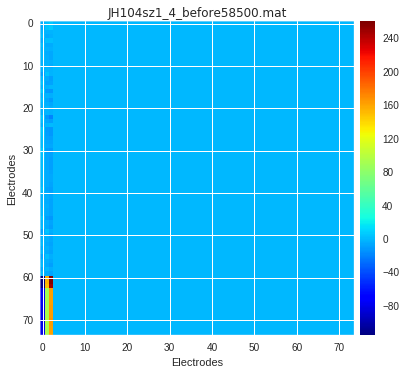

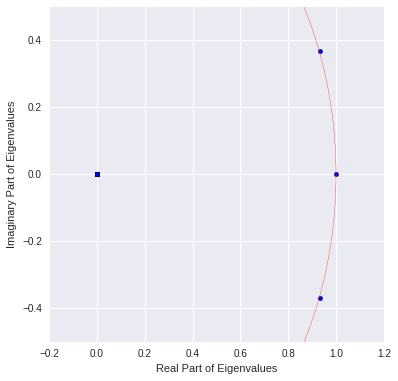

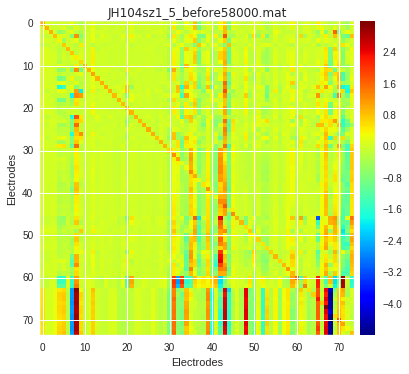

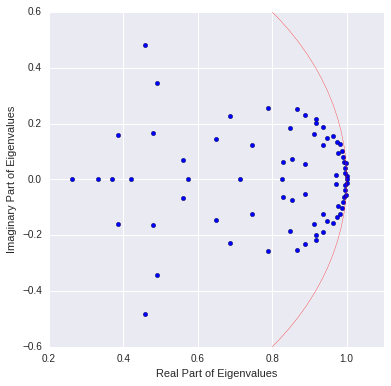

In [131]:
# plot all adjacency matrices
for file in filesInPeriod:
    fullfile = patientDir + file
    data = scipy.io.loadmat(fullfile, squeeze_me=True, struct_as_record=False)
    data = data['data']
    
    # extract the connectivity matrix and eigenspectrum
    theta_adj = data.theta_adj
    eig, v = np.linalg.eig(theta_adj)
    
    # plot heatmap of adj mat and eigenspectrum
    fig = plt.figure(figsize=(6,6))
    ax = plt.gca()
    im = plt.imshow(theta_adj, interpolation='none', cmap='jet')
    plt.xlabel('Electrodes')
    plt.ylabel('Electrodes')
    plt.title(str(file))
    vmin, vmax = plt.gci().get_clim()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.08)
    plt.colorbar(im, cax=cax)

    # plot eigenspectrum
    fig = plt.figure(figsize=(6,6))
    axes = plt.gca()
    plt.scatter(eig.real, eig.imag)
    circ = plt.Circle((0, 0), radius=1, edgecolor='r', facecolor='None')
    axes.add_patch(circ)
    plt.xlabel('Real Part of Eigenvalues')
    plt.ylabel('Imaginary Part of Eigenvalues')
#     break

plt.show()

## Right Before Seizure

This analyzes the:

* eigenspectrum
* adjacency mat right before seizure. 

Also looks at the perturbation necessary to destabilize the network here.

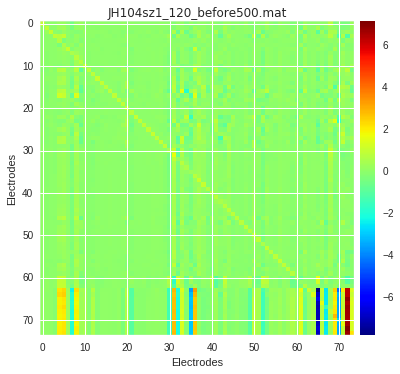

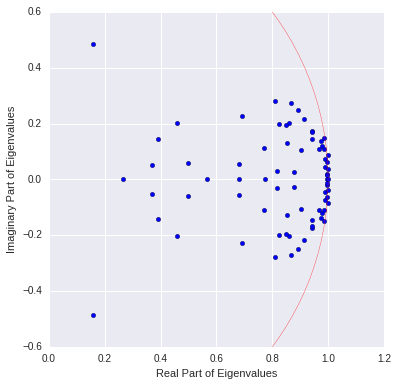

1.00301344245


In [132]:
## PLOTTING THE LAST FEW TIME POINTS
sortedMatfiles = natsorted(matFiles)

fullfile = patientDir + sortedMatfiles[len(matFiles)-1]
data = scipy.io.loadmat(fullfile, squeeze_me=True, struct_as_record=False)
data = data['data']

# extract the connectivity matrix and eigenspectrum
theta_adj = data.theta_adj
eig, v = np.linalg.eig(theta_adj)

# plot heatmap of adj mat and eigenspectrum
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
im = plt.imshow(theta_adj, interpolation='none', cmap='jet')
plt.xlabel('Electrodes')
plt.ylabel('Electrodes')
plt.title(sortedMatfiles[len(matFiles)-1])
vmin, vmax = plt.gci().get_clim()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.08)
plt.colorbar(im, cax=cax)


fig = plt.figure(figsize=(6,6))
axes = plt.gca()
plt.scatter(eig.real, eig.imag)
plt.xlabel('Real Part of Eigenvalues')
plt.ylabel('Imaginary Part of Eigenvalues')
ymin,ymax = axes.get_ylim()
xmin,xmax = axes.get_xlim()
circ = plt.Circle((0, 0), radius=1, edgecolor='r', facecolor='None')
axes.add_patch(circ)

plt.show()


print max(np.abs(eig))